Créer un nouveau notebook Python et taper le code suivant dans une nouvelle cellule :

In [1]:
import numpy as np
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1. Chargement des données et préparation : Dans un premier temps nous allons importer le jeu de données et analyser ses caractéristiques

## • Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

## • Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array (c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents.

In [2]:
data_df = pd.read_csv('./credit_scoring.csv', sep=';')
data = data_df.values
#  variables caractéristiques 
X = data[:,0:13]
#  variable à prédire
Y = data[:,13]

## • Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), nombre d’exemples positifs et négatifs (c.f. hist).

In [3]:
data.shape

(4375, 14)

On a 4375 observations dans notre l’échantillon et 14 colonnes (c.à.d 13 variables caractéristiques + 1 variable à prédire)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D46EDD9B38>,
      dtype=object)

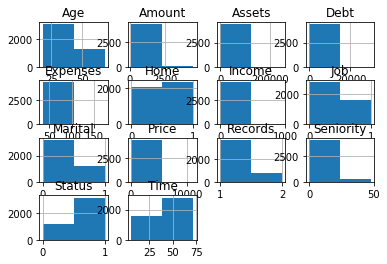

In [4]:
data_df.hist(bins = 2)

## • Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux partie une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite de test qui servira à son évaluation (c.f. train_test_split).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

on split notre dataset en deux parties ( un tier pour le test, et deux tiers pour training)

# 2. Apprentissage et évaluation de modèles : Utiliser ensuite sur votre jeu de données les algorithmes d’apprentissage supervisé suivants :

## • Un arbre CART (random_state=1)

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.26038781163435 %
La precision d'un arbre CART: 79.81132075471699 %
Le rappel d'un arbre CART: 80.80229226361033 %


## • k-plus-proches-voisins avec k=5

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 72.02216066481995 %
La precision d'un arbre CART: 77.03952901597981 %
Le rappel d'un arbre CART: 87.48806112702961 %


Entre la presicion et le rappel, dans cette application de credit scoring, le presicion est le meilleur critère pour comparer les classifications. Car plus la précision est élevée, plus le faux négatif est faible, ce qui signifie que le montant des créances irrécouvrables (pertes financières) est faible pour la banque. En outre, la précision signifie la perte de client potentiel.

En basant sur l'accuracy et le rappel des deux algorithmes, on peut voir que la classification d'arbre CART est préférable de détecter les bons clients et que la classification KNN est préférable de réduire le taux de fausses évaluations des mauvais emprunteurs.

# 3. Normalisation des variables continues :

## MinMaxScaler:

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.26038781163435 %
La precision d'un arbre CART: 79.86767485822305 %
Le rappel d'un arbre CART: 80.70678127984718 %


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 74.65373961218836 %
La precision d'un arbre CART: 80.0 %
Le rappel d'un arbre CART: 86.72397325692455 %


# à conclure: chung ta làm table r KL

# 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca = np.concatenate((X_scaled, X_pca), axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.33, random_state=42)

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.81440443213296 %
La precision d'un arbre CART: 80.01876172607881 %
Le rappel d'un arbre CART: 81.47086914995224 %


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 74.65373961218836 %
La precision d'un arbre CART: 80.0 %
Le rappel d'un arbre CART: 86.72397325692455 %


# 5. Sélection de variables :

['Income' 'Price' 'Seniority' 'Amount' 'Age' 'Assets' 'Expenses' 'Records'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


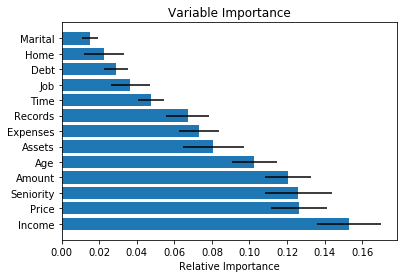

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier

from numpy.core.umath_tests import inner1d
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_scaled, Y)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.asarray(list(data_df))
print(features[sorted_idx])
padding = np.arange(X_train.size/len(X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

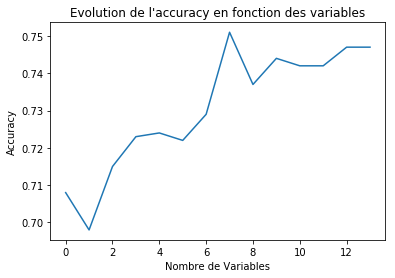

In [17]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train.shape[1]+1)
for f in np.arange(0, X_train.shape[1]+1):
    X1_f = X_train[:,sorted_idx[:f+1]]
    X2_f = X_test[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

# 6. Paramétrage des classifieurs : 

## Tuner les paramètres algorithmes k-plus proches voisins
Le principe des méthodes du k-plus proches voisins est de trouver un nombre k prédéfini d’échantillons d’entraînement le plus proche en distance du nouveau point. En général, un plus grand K supprime les effets du bruit, mais rend les limites de la classification moins distinctes. On va tuner cet paramètres K( n_neighbors).

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
df1 = data_df.iloc[:,0:13] 
k = np.arange(30)+1
parameters = {'n_neighbors': k}
scores = ['precision', 'recall']


In [19]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(KNN, parameters, cv=10, scoring='%s_macro' % score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'n_neighbors': 18}
Grid scores on development set:
0.637 (+/-0.033) for {'n_neighbors': 1}
0.635 (+/-0.035) for {'n_neighbors': 2}
0.670 (+/-0.059) for {'n_neighbors': 3}
0.664 (+/-0.054) for {'n_neighbors': 4}
0.685 (+/-0.055) for {'n_neighbors': 5}
0.686 (+/-0.043) for {'n_neighbors': 6}
0.698 (+/-0.052) for {'n_neighbors': 7}
0.701 (+/-0.056) for {'n_neighbors': 8}
0.710 (+/-0.049) for {'n_neighbors': 9}
0.704 (+/-0.045) for {'n_neighbors': 10}
0.704 (+/-0.040) for {'n_neighbors': 11}
0.705 (+/-0.030) for {'n_neighbors': 12}
0.710 (+/-0.033) for {'n_neighbors': 13}
0.707 (+/-0.038) for {'n_neighbors': 14}
0.710 (+/-0.035) for {'n_neighbors': 15}
0.711 (+/-0.030) for {'n_neighbors': 16}
0.710 (+/-0.028) for {'n_neighbors': 17}
0.715 (+/-0.036) for {'n_neighbors': 18}
0.712 (+/-0.029) for {'n_neighbors': 19}
0.715 (+/-0.037) for {'n_neighbors': 20}
0.711 (+/-0.036) for {'n_neighbors': 21}
0.713 (+/-

## Tuner les paramètres algorithmes Arbre de décision, 
Arbre de décision répété plusieurs fois à l'aide de sélections aléatoires de caractéristiques et d'échantillons (technique similaire utilisée dans des forêts aléatoires). Le paramètre random_state du fonction Arbre de décision permet de contrôler ces choix aléatoires. On va tuner cet paramètres.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
DTC = tree.DecisionTreeClassifier(random_state=1)
df1 = data_df.iloc[:,0:13] 
k = np.arange(40)+1
parameters_DTC = {'random_state': k}
scores = ['precision', 'recall']

In [21]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(DTC, parameters_DTC, cv=10, scoring='%s_macro' % score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'random_state': 15}
Grid scores on development set:
0.662 (+/-0.054) for {'random_state': 1}
0.653 (+/-0.062) for {'random_state': 2}
0.654 (+/-0.068) for {'random_state': 3}
0.657 (+/-0.045) for {'random_state': 4}
0.656 (+/-0.047) for {'random_state': 5}
0.652 (+/-0.048) for {'random_state': 6}
0.660 (+/-0.054) for {'random_state': 7}
0.651 (+/-0.053) for {'random_state': 8}
0.648 (+/-0.038) for {'random_state': 9}
0.655 (+/-0.061) for {'random_state': 10}
0.651 (+/-0.044) for {'random_state': 11}
0.656 (+/-0.040) for {'random_state': 12}
0.651 (+/-0.038) for {'random_state': 13}
0.650 (+/-0.045) for {'random_state': 14}
0.663 (+/-0.057) for {'random_state': 15}
0.651 (+/-0.045) for {'random_state': 16}
0.655 (+/-0.058) for {'random_state': 17}
0.649 (+/-0.046) for {'random_state': 18}
0.651 (+/-0.036) for {'random_state': 19}
0.651 (+/-0.061) for {'random_state': 20}
0.656 (+/-0.047) for {'random_

## 7. Création d’un pipeline

On cree une pipeline avec 2 methode Normalisation(Standard et Min max), ACP et 2 methode de classfication KNN et decisiontree

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA()),
                    ('clf', KNeighborsClassifier(n_neighbors=5))
                   ])

pipe_lr.fit(X_train, Y_train)
'KNeighborsClassification Accuracy: %.3f' % pipe_lr.score(X_test, Y_test) 


'KNeighborsClassification Accuracy: 0.747'

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA()),
                    ('clf', tree.DecisionTreeClassifier(random_state=1))
                   ])

pipe_lr.fit(X_train, Y_train)
'DecisionTreeClassifier Accuracy: %.3f' % pipe_lr.score(X_test, Y_test) 

'DecisionTreeClassifier Accuracy: 0.706'

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', MinMaxScaler()),
                    ('pca', PCA()),
                    ('clf', KNeighborsClassifier(n_neighbors=5))
                   ])

pipe_lr.fit(X_train, Y_train)
'KNeighborsClassification Accuracy: %.3f' % pipe_lr.score(X_test, Y_test) 

'KNeighborsClassification Accuracy: 0.742'

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', MinMaxScaler()),
                    ('pca', PCA()),
                    ('clf', tree.DecisionTreeClassifier(random_state=1))
                   ])

pipe_lr.fit(X_train, Y_train)
'DecisionTreeClassifier Accuracy: %.3f' % pipe_lr.score(X_test, Y_test) 

'DecisionTreeClassifier Accuracy: 0.705'

## 8. Comparaison de plusieurs algorithmes d’apprentissage :

La documentation indique que scikit-learn utilise une version optimisée de l'algorithme CART. On ne peut pas donc probablement pas utiliser arbre ID3 
http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#base_estimator = [None,  KNeighborsClassifier(n_neighbors=5), tree.DecisionTreeClassifier(random_state=1)]
clfs = {
'RF': RandomForestClassifier(n_estimators=50),
'KNN': KNeighborsClassifier(n_neighbors=5),
'NBS':GaussianNB(),
'MLP':MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20, 10), random_state=1), ## MultilayerPerceptron à deux couches de tailles respectives 20 et 10
'DT':DecisionTreeClassifier(random_state=1), 
'Bagging': BaggingClassifier(n_estimators=50),
'Adaboost': AdaBoostClassifier(n_estimators=50, random_state=1)
}
kf = KFold(n_splits=10, shuffle=True, random_state=0)
for i in clfs:
    clf = clfs[i]
    cv_acc = cross_val_score(clf, X_train, Y_train, cv=kf)
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))

Accuracy for RF is: 0.784 +/- 0.026
Accuracy for KNN is: 0.752 +/- 0.021
Accuracy for NBS is: 0.766 +/- 0.023
Accuracy for MLP is: 0.779 +/- 0.028
Accuracy for DT is: 0.692 +/- 0.017
Accuracy for Bagging is: 0.779 +/- 0.022
Accuracy for Adaboost is: 0.789 +/- 0.019
